In [7]:
import pandas as pd

df = pd.read_csv("cleaned_fake_job_postings_cleaned.csv")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [8]:
X = df['clean_text']
y = df['fraudulent']


In [9]:
tfidf = TfidfVectorizer(max_features=10000)  # you can adjust
X_tfidf = tfidf.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [11]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9723154362416108
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.45      0.62       181

    accuracy                           0.97      3576
   macro avg       0.99      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576



In [13]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9821029082774049
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.65      0.79       181

    accuracy                           0.98      3576
   macro avg       0.99      0.82      0.89      3576
weighted avg       0.98      0.98      0.98      3576



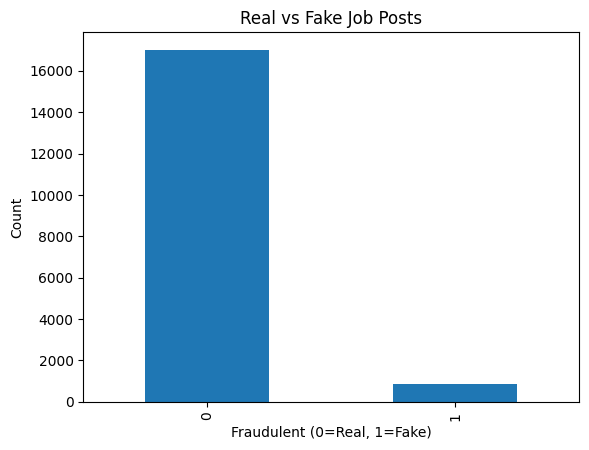

In [14]:
import matplotlib.pyplot as plt

df['fraudulent'].value_counts().plot(kind='bar')
plt.title("Real vs Fake Job Posts")
plt.xlabel("Fraudulent (0=Real, 1=Fake)")
plt.ylabel("Count")
plt.show()


In [17]:
import pickle
import os

os.makedirs("models", exist_ok=True)

# Save vectorizer
with open("models/tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save model (logistic regression)
with open("models/model.pkl", "wb") as f:
    pickle.dump(log_reg, f)
